In [8]:
import bqplot
import numpy as np
import pandas as pd
import ipywidgets
import bqplot 
import PIL.Image as Image

In [9]:
CPS_df = pd.read_csv("https://data.cityofchicago.org/resource/9xs2-f89t.csv")
CPS_df

,school_id,name_of_school,elementary_or_high_school,street_address,city,state,zip_code,phone_number,link_,network_manager,...,rcdts_code,x_coordinate,y_coordinate,latitude,longitude,community_area_number,community_area_name,ward,police_district,location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,150000000000000,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,150000000000000,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,150000000000000,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,...,150000000000000,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,...,150000000000000,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,609844,William W Carter Elementary School,ES,5740 S Michigan Ave,Chicago,IL,60637,(773) 535-0860,http://schoolreports.cps.edu/SchoolProgressRep...,Burnham Park Elementary Network,...,150000000000000,1178101.365,1866810.123,41.789841,-87.622490,40,WASHINGTON PARK,20,2,"(41.78984129, -87.62248974)"
562,610308,Wilma Rudolph Elementary Learning Center,ES,110 N Paulina St,Chicago,IL,60612,(773) 534-7460,http://schoolreports.cps.edu/SchoolProgressRep...,Fulton Elementary Network,...,150000000000000,1165013.632,1900863.727,41.883575,-87.669514,28,NEAR WEST SIDE,27,13,"(41.88357478, -87.66951363)"
563,610088,Wolfgang A Mozart Elementary School,ES,2200 N Hamlin Ave,Chicago,IL,60647,(773) 534-4160,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,150000000000000,1150644.396,1914368.955,41.920927,-87.721925,22,LOGAN SQUARE,35,25,"(41.92092734, -87.72192541)"
564,609977,Woodlawn Community Elementary School,ES,6657 S Kimbark Ave,Chicago,IL,60637,(773) 535-0801,http://schoolreports.cps.edu/SchoolProgressRep...,Burnham Park Elementary Network,...,150000000000000,1185825.188,1860883.579,41.773400,-87.594356,42,WOODLAWN,5,3,"(41.77339962, -87.59435584)"


In [10]:
CPS_df["table_number"] = np.arange(566)

In [11]:
print(CPS_df["safety_icon_"].unique())
icons = CPS_df["safety_icon_"].unique()

count = np.zeros(len(icons))

['Very Strong' 'Average' 'Strong' 'Weak' 'Very Weak' 'NDA']


In [12]:
mySelectedLabel = ipywidgets.Label() 
mySelectedLabel.value = str(count[0]) + ' Very Strong Safety Schools, ' + str(count[1]) + ' Average Safety Schools, ' + str(count[2]) + ' Weak Safety Schools, ' + str(count[3]) + ' Very Weak Safety Schools, and ' + str(count[4]) + ' Not Available' 

In [36]:
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()

scatters = bqplot.Scatter(x=CPS_df["table_number"], y=CPS_df["average_student_attendance"], scales={'x':x_sc, 'y':y_sc},
                          default_size=5,)

x_ax = bqplot.Axis(scale=x_sc, label='Schools')
y_ax = bqplot.Axis(scale=y_sc, label='Average % Student Attendance', orientation='vertical')

selector = bqplot.interacts.FastIntervalSelector(scale=x_sc, marks=[scatters])
def on_selected(change):
    count = np.zeros(len(icons))
    check = str(change)
    if (check != 'None'):
        for i in range(len(change['new'])):
            for j in range(len(icons)):
                if(CPS_df.iloc[change['new'][i]]["safety_icon_"] == icons[j]):
                    count[j] += 1 
    mySelectedLabel.value = str(count[0]) + ' Very Strong Safety Schools, ' + str(count[1]) + ' Average Safety Schools, ' + str(count[2]) + ' Weak Safety Schools, ' + str(count[3]) + ' Very Weak Safety Schools, and ' + str(count[4]) + ' Not Available' 
        
selector.observe(on_selected,'selected')

fig = bqplot.Figure(marks=[scatters], axes=[x_ax, y_ax],  interaction = selector)
fig.layout.height="600px"
fig.layout.width="900px"

myDashboard = ipywidgets.VBox([mySelectedLabel, fig])


In [37]:
Bar1516 = Image.open(r"BarChar_SY1516.png")

In [38]:
Chart1516 = Image.open(r"Chart_Summary_SY1516.png")

In [39]:
Bar1819 = Image.open(r"BarChar_SY1819.png")

In [40]:
Chart1819 = Image.open(r"Chart_Summary_SY1819.png")

In [41]:
myDashboard

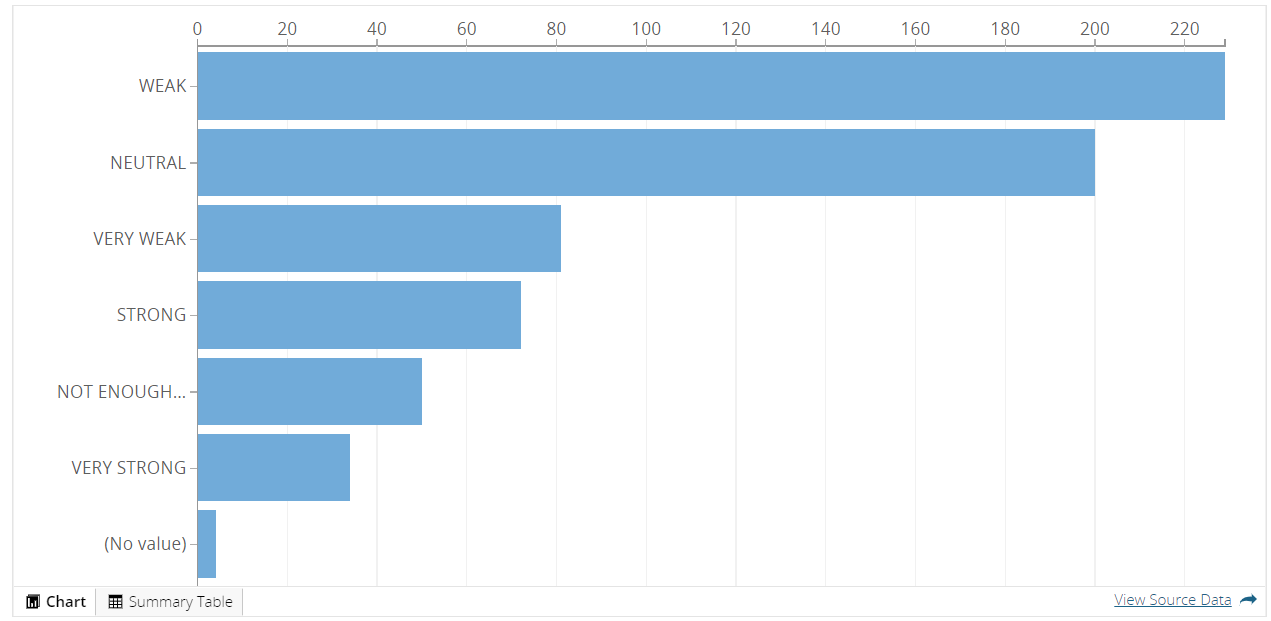

In [42]:
Bar1516

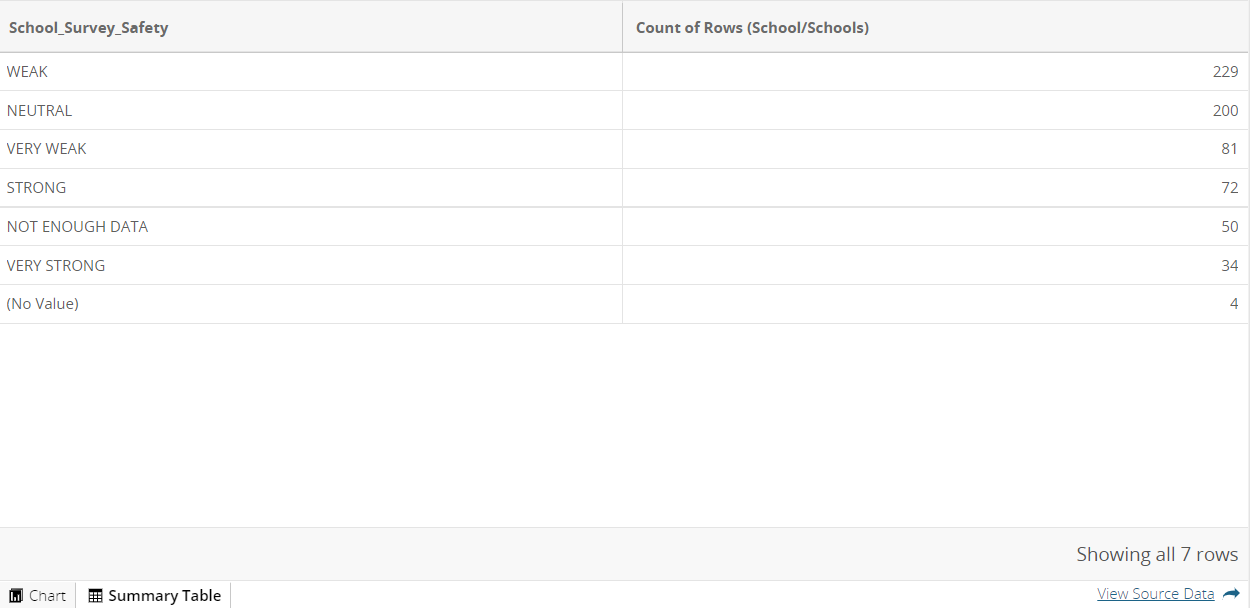

In [43]:
Chart1516

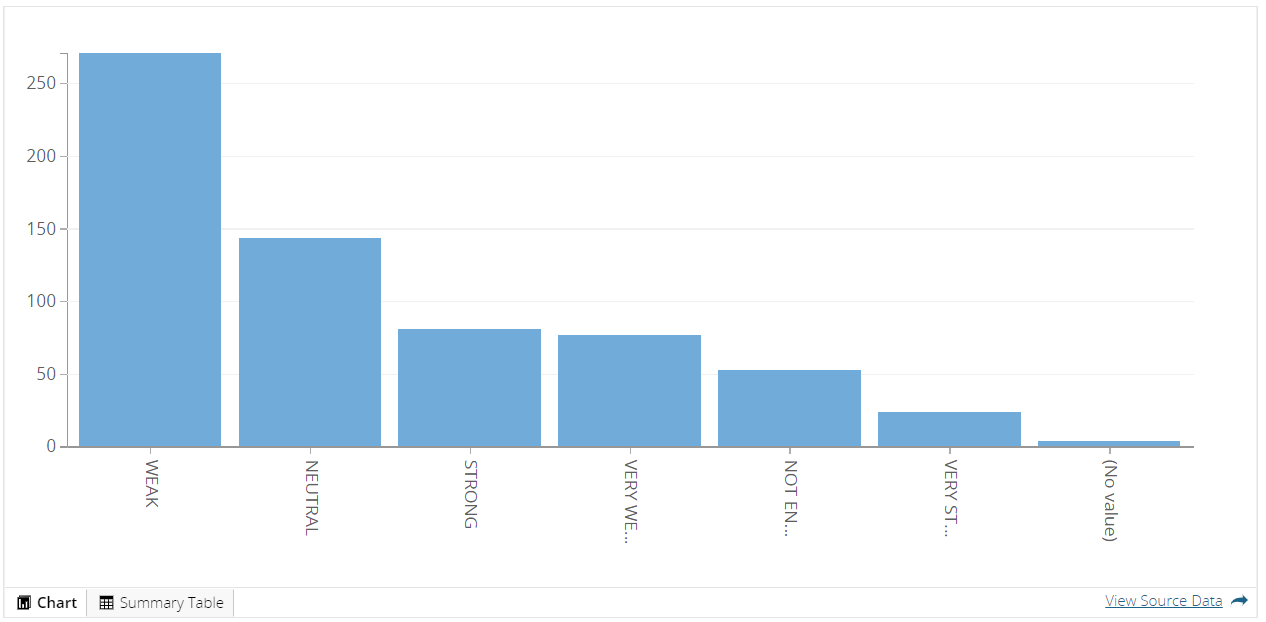

In [44]:
Bar1819

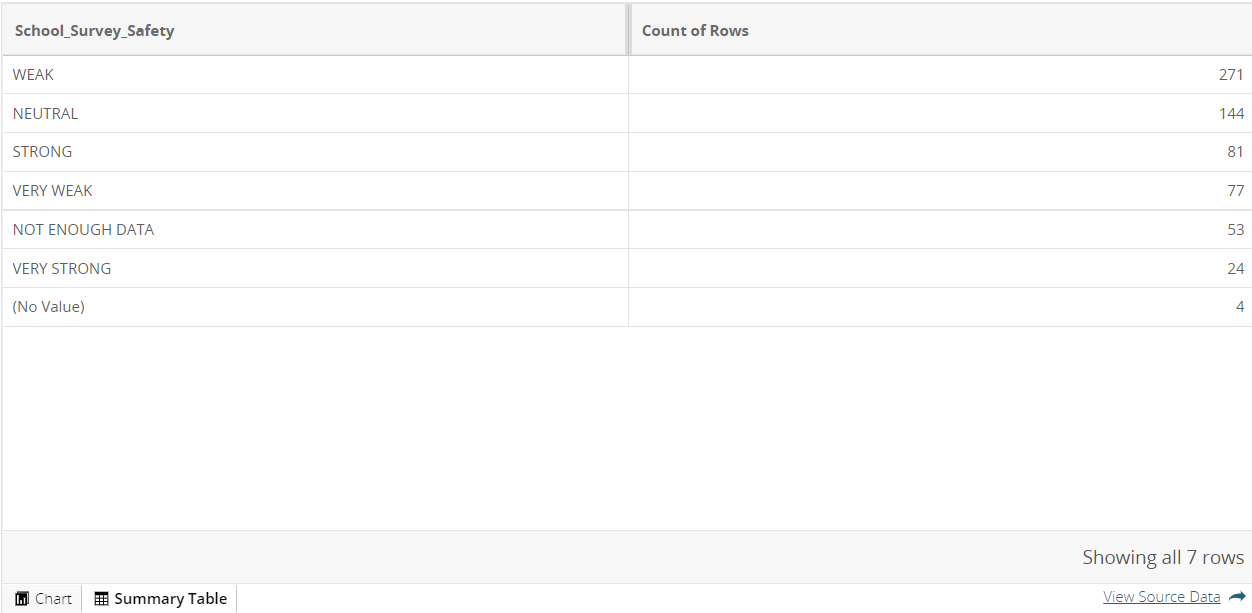

In [45]:
Chart1819

## Chicago Public School Safety
As school is an institution that holds, hundreds, to thousands, to even tens of thousands of kids, the security and safety of a school should be a given. Within these visualizations I wanted to show how people over the years have perceieved the public schools in Chicago, Illinois in terms of Safety.

The first visualization found in the python file is an interactive dashboard that contains a scatter plot and a text box. The scatterplot is a representation of all the Chicago Public Schools in the dataset during the 2011-2012 school year and their average percent of student attendance. The scatter plot allows you to move your mouse up and down to change the range of the how many schools you want to pick. Then once you found the range of your liking, you can left click your mouse to lock the range, move your mouse left or right to the desired section of the scatterplot. From there the text box at the top will show how many schools have certain safety icons, giving a general idea oh how safe the desired interval is.

The next two visualizations were visualizations I made through the Chicago Data Portal. They were from the progress report of Chicago Public Schools during the 2015-2016 school year. One is a bar chart that shows the number of Chicago Public Schools that people deemed as very weak, weak, average, strong, or very strong in terms of security. The other is a table that shows the exact numerical values from the bar chart.

I then made the same visualizations from the progress report of Chicago Public Schools during the 2018-2019 school year. This would allow us to see how Chicago has been doing over the years in terms of the public's perceptions of security and keeping the next generation safe.

As you look you can find that it is Chicago is not improving. If anything, they are getting worse as "very strong" and "neutral" schools decrease in contrast to the "very weak" and "weak" safety schools increasing.

I hope this brings to light the urgency of change that Chicago needs to go through in order to make schools a safe place for kids to spend a third of their day to learn and to better themselves.

All datasets can be found here: https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t https://data.cityofchicago.org/Education/Chicago-Public-Schools-School-Progress-Reports-SY1/fvrx-esxp https://data.cityofchicago.org/Education/Chicago-Public-Schools-School-Progress-Reports-SY1/dw27-rash

